# ARIMA 

http://machinelearningmastery.com/grid-search-arima-hyperparameters-with-python/

In [6]:
import numpy as np
import pandas as pd
from pandas import read_csv
from pandas import datetime
import matplotlib.pyplot as plt

# Zadanie
Wczytaj dane "Shampoo Sales Dataset", które opisują miesięczną liczbę sprzedaży szamponu przez okres 3 lat.

In [8]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('sales-of-shampoo-over-a-three-ye.csv', header=0, 
                  parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
rng1 = pd.date_range('1901-01-01', periods=len(series), freq='M')
print(series.head())

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales of shampoo over a three year period, dtype: float64


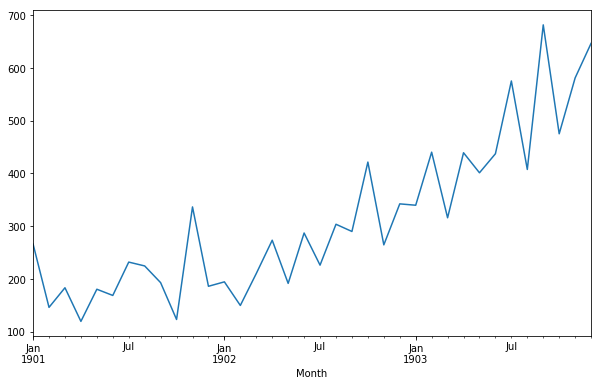

In [9]:
plt.figure(figsize=(10,6));
series.plot()
plt.show()

Po pierwsze, będziemy ostatni nasze modele na ostatnim roku. Biorąc pod uwagę dane miesięczne, oznacza to, że 12 ostatnich obserwacji zostanie wykorzystanych jako zbiór testowy.

W celu oceny skuteczności modelu, zastosujemy metodę walidacji walk-forward. Oznacza to, że nauczymy model na danych historycznych. Będziemy prognozować najbliższy punkt i oceniać poziom predykcji. Obserwacja zostanie następnie dodana do zestawu danych uczących i proces powtórzony.


In [10]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [11]:
X = series.values
train, test = X[0:-12], X[-12:]

In [12]:
print(series.index)
rng1 = pd.date_range('1900-12-01', periods=len(X)-12, freq='M').shift(1, freq=pd.datetools.day)
rng2 =pd.date_range('1902-12-01', periods=12, freq='M').shift(1, freq=pd.datetools.day)
print(rng1)
print(rng2)

DatetimeIndex(['1901-01-01', '1901-02-01', '1901-03-01', '1901-04-01',
               '1901-05-01', '1901-06-01', '1901-07-01', '1901-08-01',
               '1901-09-01', '1901-10-01', '1901-11-01', '1901-12-01',
               '1902-01-01', '1902-02-01', '1902-03-01', '1902-04-01',
               '1902-05-01', '1902-06-01', '1902-07-01', '1902-08-01',
               '1902-09-01', '1902-10-01', '1902-11-01', '1902-12-01',
               '1903-01-01', '1903-02-01', '1903-03-01', '1903-04-01',
               '1903-05-01', '1903-06-01', '1903-07-01', '1903-08-01',
               '1903-09-01', '1903-10-01', '1903-11-01', '1903-12-01'],
              dtype='datetime64[ns]', name='Month', freq=None)
DatetimeIndex(['1901-01-01', '1901-02-01', '1901-03-01', '1901-04-01',
               '1901-05-01', '1901-06-01', '1901-07-01', '1901-08-01',
               '1901-09-01', '1901-10-01', '1901-11-01', '1901-12-01',
               '1902-01-01', '1902-02-01', '1902-03-01', '1902-04-01',
             

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.core.datetools.day is deprecated and will be removed in a future version.
  
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.core.datetools.day is deprecated and will be removed in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
#trainS=pd.Series(np.stack(predictions,1)[0], index=data['1955-05-01':'1960-05-01'].index)
trainS=pd.Series(train, index=rng1)
testS=pd.Series(test,index=rng2)

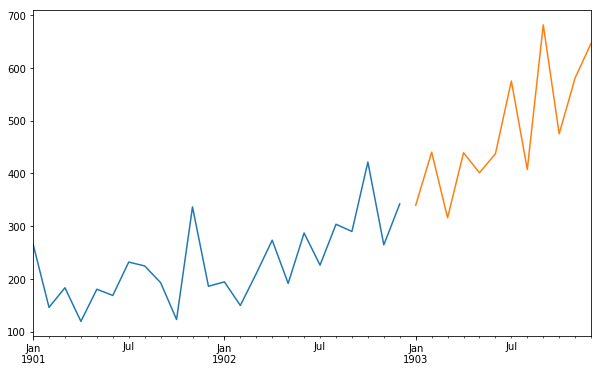

In [14]:
plt.figure(figsize=(10,6));
trainS.plot()
testS.plot()
plt.show()

# Zadanie
Naucz modela ARIMA(4,1,0)

C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


Test RMSE: 84.832


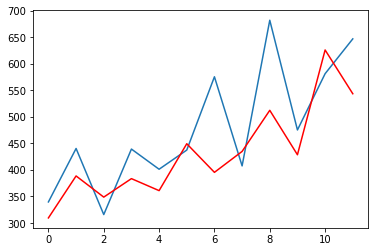

In [15]:
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    # fit model
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit()
    # one step forecast
    yhat = model_fit.forecast()[0]
    # store forecast and ob
    predictions.append(yhat)
    history.append(test[t])
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [16]:
predictions

[array([309.59069369]),
 array([388.6415452]),
 array([348.77807914]),
 array([383.60212542]),
 array([360.99206019]),
 array([449.34212676]),
 array([395.44934387]),
 array([434.86478784]),
 array([512.30209145]),
 array([428.59713641]),
 array([625.99361005]),
 array([543.53890267])]

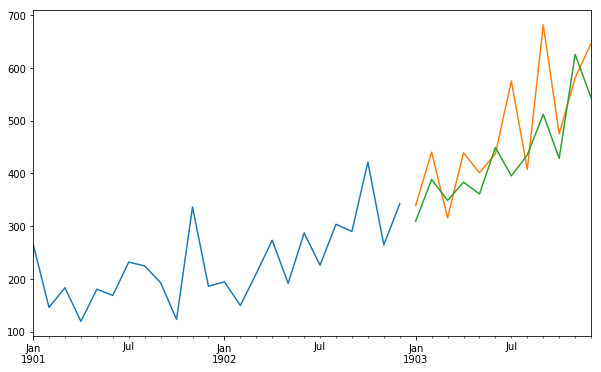

In [17]:
pre=pd.Series(np.stack(predictions,1)[0], index=testS.index)

plt.figure(figsize=(10,6));
trainS.plot()
testS.plot()
pre.plot()
plt.show()

# Zadanie
Napisz procedurę Cross Validation dla modelu ARIMA

In [18]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    return error

In [19]:
import warnings
warnings.filterwarnings("ignore")

In [20]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

In [21]:
# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=52425.268
ARIMA(0, 0, 1) MSE=38145.139
ARIMA(0, 0, 2) MSE=23989.475
ARIMA(0, 1, 0) MSE=18003.173
ARIMA(0, 1, 1) MSE=9558.277
ARIMA(0, 2, 0) MSE=67339.808
ARIMA(0, 2, 1) MSE=18322.484
ARIMA(1, 0, 0) MSE=23113.028
ARIMA(1, 1, 0) MSE=7121.362
ARIMA(1, 1, 1) MSE=7003.686
ARIMA(1, 2, 0) MSE=18608.036
ARIMA(2, 1, 0) MSE=5689.927
ARIMA(2, 1, 1) MSE=7759.707
ARIMA(2, 2, 0) MSE=9860.944
ARIMA(4, 1, 0) MSE=6649.593
ARIMA(4, 1, 1) MSE=6796.306
ARIMA(4, 2, 0) MSE=7596.339
ARIMA(4, 2, 1) MSE=4694.876
ARIMA(6, 1, 0) MSE=6810.077
ARIMA(6, 2, 0) MSE=6261.083
ARIMA(8, 1, 0) MSE=6579.778
Best ARIMA(4, 2, 1) MSE=4694.876


# Zadanie
Wykonaj predykcję dla najlepszego modelu.

In [ ]:
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    # fit model
    model = ARIMA(history, order=(4,2,1))
    model_fit = model.fit()
    # one step forecast
    yhat = model_fit.forecast()[0]
    # store forecast and ob
    predictions.append(yhat)
    history.append(test[t])
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [ ]:
pre=pd.Series(np.stack(predictions,1)[0], index=testS.index)

plt.figure(figsize=(10,6));
trainS.plot()
testS.plot()
pre.plot()
plt.show()

# Zadanie
Znajdź najlepszy model ARIMA dla danych:

In [ ]:
series = Series.from_csv('D:\\Dropbox\\szkolenia\\time_series\\sunspots.csv', header=0)
series.head()